In [141]:
import numpy as np
import skimage
import skimage.io
import scipy.fftpack
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

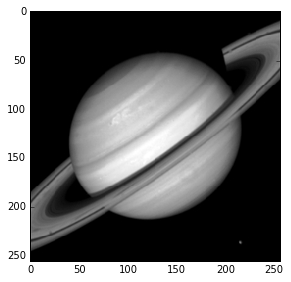

In [216]:
img = skimage.io.imread("saturn.jpg")
img = skimage.color.rgb2gray(img)
skimage.io.imshow(img)

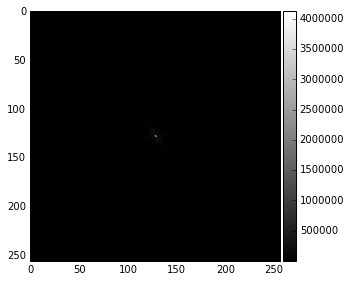

In [230]:
spec = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))
abs_spec = np.abs(spec)
skimage.io.imshow(abs_spec, cmap=cm.gray)

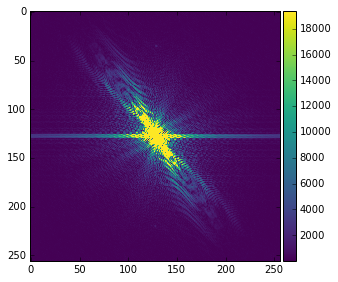

In [231]:
min_percentile = np.percentile(abs_spec, 1)
max_percentile = np.percentile(abs_spec, 99)
abs_spec[abs_spec < min_percentile] = min_percentile
abs_spec[abs_spec > max_percentile] = max_percentile

skimage.io.imshow(abs_spec)
skimage.io.show()

In [232]:
abs_spec.shape

(256, 256)

In [233]:
def without_low(spec, part):
    low_spec = np.copy(spec)
    h, w = spec.shape
    r = int((part * h + part * w)) // 2 // 2
    mnh, mxh, mnw, mxw = h // 2 - r, h // 2 + r, w // 2 - r, w // 2 + r

    low_spec[mnh:mxh,mnw:mxw] = 0
    
    return low_spec

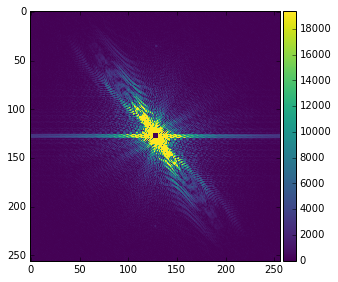

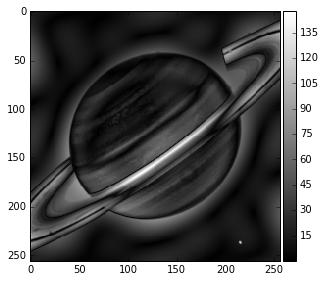

In [236]:
n_low = without_low(spec, 0.03)
skimage.io.imshow(without_low(abs_spec, 0.03))
skimage.io.show()
skimage.io.imshow(np.abs(scipy.fftpack.ifft2(n_low)), cmap=cm.gray)
skimage.io.show()

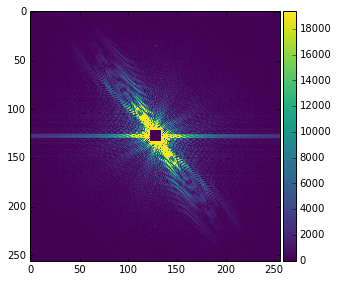

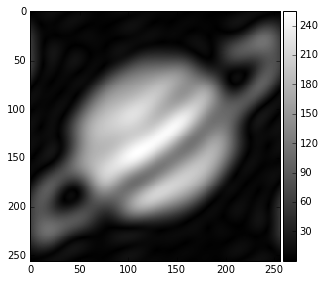

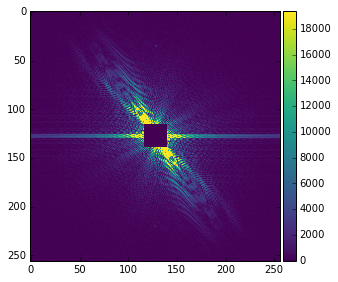

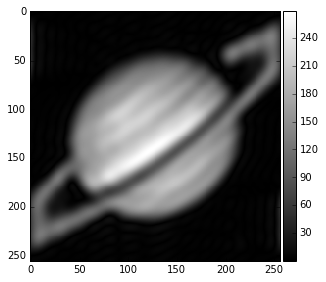

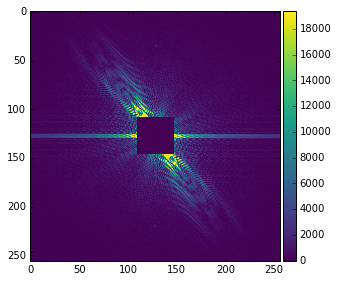

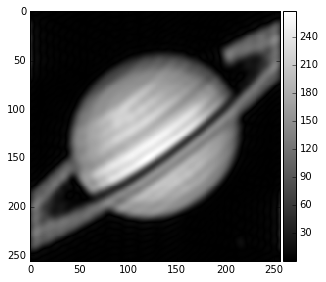

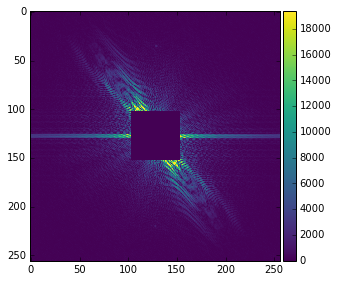

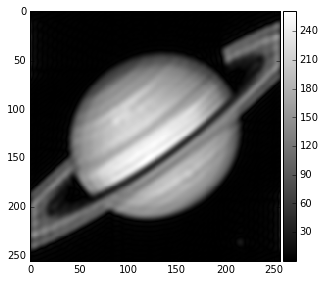

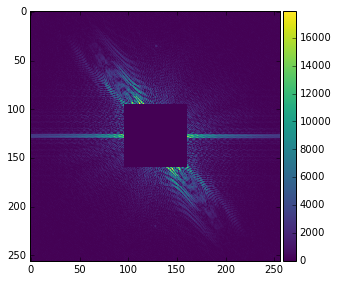

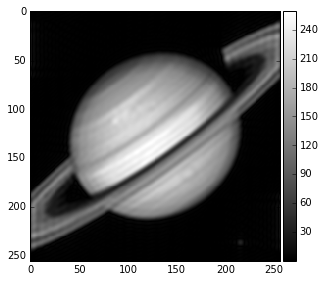

In [239]:
for p in [0.05, 0.1, 0.15, 0.2, 0.25]:
    n_low = without_low(spec, p)
    skimage.io.imshow(without_low(abs_spec, p))
    skimage.io.show()
    skimage.io.imshow(np.abs(scipy.fftpack.ifft2(spec - n_low)), cmap=cm.gray)
    skimage.io.show()